In [3]:

from data import get_mnist
import numpy as np
import matplotlib.pyplot as plt
import sys
import numpy
images, labels = get_mnist()
w_i_h = np.random.uniform(-0.5, 0.5, (20, 784))
w_h_o = np.random.uniform(-0.5, 0.5, (10, 20))
b_i_h = np.zeros((20, 1))
b_h_o = np.zeros((10, 1))
learn_rate = 0.01
nr_correct = 0
epochs = 3
for epoch in range(epochs):
    for img, l in zip(images, labels):
        img.shape += (1,)
        l.shape += (1,)
        h_pre = b_i_h + w_i_h @ img
        h = 1 / (1 + np.exp(-h_pre))
        o_pre = b_h_o + w_h_o @ h
        o = 1 / (1 + np.exp(-o_pre))
        e = 1 / len(o) * np.sum((o - l) ** 2, axis=0)
        nr_correct += int(np.argmax(o) == np.argmax(l))
        delta_o = o - l
        w_h_o += -learn_rate * delta_o @ np.transpose(h)
        b_h_o += -learn_rate * delta_o
        delta_h = np.transpose(w_h_o) @ delta_o * (h * (1 - h))
        w_i_h += -learn_rate * delta_h @ np.transpose(img)
        b_i_h += -learn_rate * delta_h
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0

Acc: 85.93%
Acc: 92.37%
Acc: 93.35%


In [9]:
from PIL import Image
param=100
def prepare_real_photo(path):
    img = Image.open(path)
    img = img.convert("L")
    img=img.resize((28,28),Image.BOX)
    pix = img.load()
    lis=[]
    width, height = img.size
    for y in range(height):
        for x in range(width):
            # print(pix[x,y],end=" ")
            if(pix[x,y]>158):pix[x,y]=(255)
            else :pix[x,y]=(0)



    for i in range(height):
        for j in range(width):
            # print(pix[i,j])
            if(0 == pix[j,i]) :lis.append(1)
            else: 
                lis.append(0)
    numpy_arr=np.array(lis)
    img=numpy_arr
    img.shape += (1,)
    img=img.reshape(784, 1)
    img=(img*param).astype('int')
    return numpy_arr

hidden layer = 20
hidden layer = 10
[0, 0, 0, 0, 0, 0, 0, 0, 0, 100]


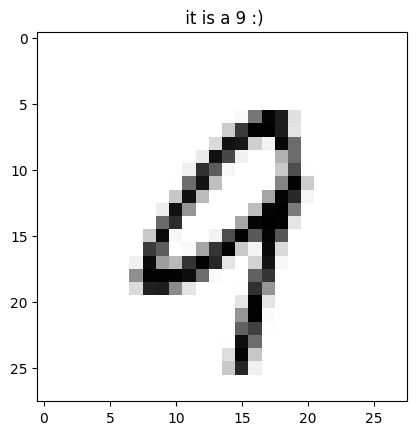

In [31]:

import math
param=100
b_i_h_int=(b_i_h*param).astype('int')
w_i_h_int=(w_i_h*param).astype('int')
b_h_o_int=(b_h_o*param).astype('int')
w_h_o_int=(w_h_o*param).astype('int')
def sigmoid(x):
    if(x<-6) :return 0
    if(x>37) : return 1
    return 1 / (1 + math.exp(-x))

def convert_to_list_1D(arr):
    lista=[]
    lista_listi=arr.tolist()
    for i in lista_listi:
        lista.append(i[0])
    return lista
def convert_to_list_2D(arr):
    l=[]
    for i in arr:
        l.append(i.tolist())
    return l
def prepare_img():
    index = int(random.random()*23523%31251)
    img = images[index]
    #img=prepare_real_photo("real_croped.bmp")
    img.shape += (1,)
    img=img.reshape(784, 1)
    img=(img*param).astype('int')
    return img
def activation(lista):
    new_list=[]
    for i in lista:
        #print(i)
        new_list.append(int(sigmoid(i)*100))
    return new_list
    
img=prepare_img()
img_list=convert_to_list_1D(img)
b_i_h_list=convert_to_list_1D(b_i_h_int)
b_h_o_list=convert_to_list_1D(b_h_o_int)

w_i_h_list=convert_to_list_2D(w_i_h_int)
w_h_o_list=convert_to_list_2D(w_h_o_int)

def compute_layer(img,weight,bias):
    hidden_layer=[]
    for i,bias in zip(weight,bias):
        number=0
        for j,z in zip(i,img):
            number+=j*z
        number+=bias
        hidden_layer.append(number)
        
    print("hidden layer =",len(hidden_layer))
    return hidden_layer

        


lista=compute_layer(img_list,w_i_h_list,b_i_h_list)
act=activation(lista)
lista=compute_layer(act,w_h_o_list,b_h_o_list)
act=activation(lista)

print(act)
plt.imshow(img.reshape(28, 28), cmap="Greys")
plt.title(f" it is a {act.index(max(act))} :)")
plt.show()


In [32]:
def prepare_img_for_verilog():
    print("reg signed [31:0] img [0:783] = '{",end="")
    count=0
    for i in img_list:
        count+=1
        if(count==len(img_list)):print(i,end="")
        else:print(i,end=',')
    print("};")
prepare_img_for_verilog()

reg signed [31:0] img [0:783] = '{0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,61,98,90,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,81,99,99,90,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,94,92,29,10,97,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,94,78,11,0,0,41,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,84,71,6,0,0,0,32,76,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,93,36,0,0,0,0,56,99,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,94,38,0,0,0,0,45,98,86,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,94,50,0,0,0,0,37,98,99,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,85,0,0,0,0,45,98,100,99,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,96,7,0,0,10,76,99,72,98,73,0,0,0,0,0,0,0,0,0,0,0,0,0